In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns; sns.set()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading dataset
data=pd.read_csv(r"C:/Users/audit_risk.csv")
print(data)

     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A   PARA_B  Score_B  \
0            3.89          23    4.18      0.6   2.508   2.5000      0.2   
1            3.89           6    0.00      0.2   0.000   4.8300      0.2   
2            3.89           6    0.51      0.2   0.102   0.2300      0.2   
3            3.89           6    0.00      0.2   0.000  10.8000      0.6   
4            3.89           6    0.00      0.2   0.000   0.0800      0.2   
5            3.89           6    0.00      0.2   0.000   0.8300      0.2   
6            3.89           7    1.10      0.4   0.440   7.4100      0.4   
7            3.89           8    8.50      0.6   5.100  12.0300      0.6   
8            3.89           8    8.40      0.6   5.040  11.0500      0.6   
9            3.89           8    3.98      0.6   2.388   0.9900      0.2   
10           3.89           8    5.43      0.6   3.258  10.7700      0.6   
11           3.89           8   15.38      0.6   9.228  40.1400      0.6   
12          

In [3]:
data.shape

(776, 27)

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

#### Handling Missing Values

In [5]:
data.isna().sum().sort_values(ascending=False)

Money_Value       1
Risk              0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Score_MV          0
Audit_Risk        0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Sector_score      0
dtype: int64

##### It suggests that there are no missing values except one null value in Money_value column

In [6]:
data=data.dropna(how='any',axis=0)  #Deleting one null value containing row

In [7]:
data.shape

(775, 27)

In [8]:
data.head() 

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [9]:
data.describe(include = ['O']) #Lists all categorical variables

,LOCATION_ID
count,775
unique,45
top,8
freq,76


In [10]:
data.describe() # Lists all float and int values containing variables

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.0,775.000000,775.000000
mean,20.138877,2.453059,0.351484,1.352712,10.813924,0.313290,6.342181,13.235241,5.067742,0.223742,...,0.519226,0.104516,0.216774,0.053677,2.703484,17.701560,0.572903,0.5,7.177034,0.393548
std,24.301417,5.681977,0.174082,3.442348,50.114461,0.169865,30.091403,51.343841,0.264608,0.080399,...,0.290468,0.531360,0.068028,0.306027,0.859106,54.772482,0.444825,0.0,38.691674,0.488852
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.540000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.584000,0.400000,0.5,0.316800,0.000000
50%,3.890000,0.880000,0.200000,0.176000,0.410000,0.200000,0.082000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.556000,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.887000,7.725000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.300000,10.703000,0.400000,0.5,3.252600,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


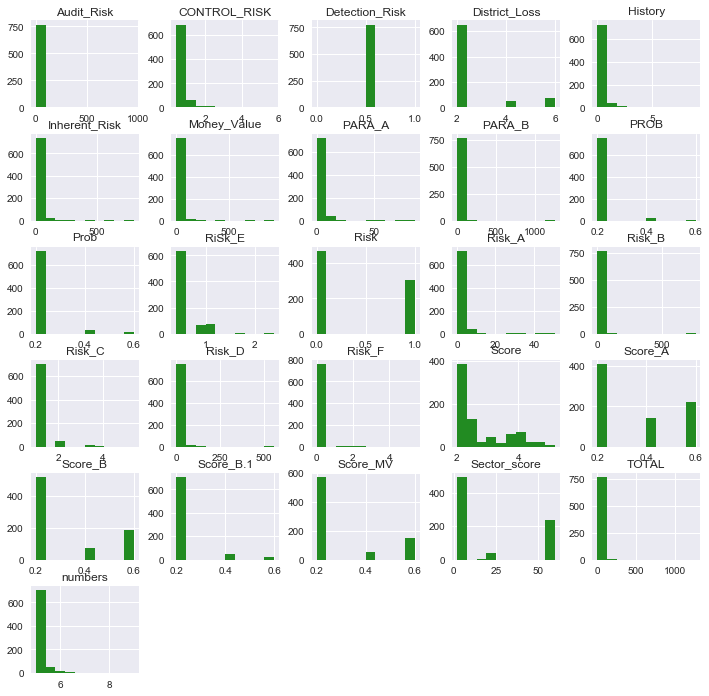

In [11]:
plt.style.use('seaborn')
data.hist(figsize=[12,12],color="forestgreen")
plt.show()

In [12]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

###### Removing irrelevant & unique columns

In [13]:
#Number of unique values
data.nunique().sort_values(ascending=True)

Detection_Risk      1
Risk                2
Prob                3
PROB                3
District_Loss       3
Score_B.1           3
Score_MV            3
Score_A             3
Score_B             3
numbers             5
Risk_C              5
RiSk_E              5
Risk_F              7
History             7
CONTROL_RISK       11
Sector_score       13
Score              17
LOCATION_ID        45
Risk_D            328
Money_Value       328
PARA_B            358
Risk_B            360
PARA_A            362
Risk_A            362
TOTAL             471
Inherent_Risk     584
Audit_Risk        601
dtype: int64

In [14]:
#Removing Location_ID as it is irrelevant
#Removing Total as it is sum of Para_A & Para_B
#Removing Detection_Risk as it has only one unique value

data=data.drop(['LOCATION_ID','TOTAL', 'Detection_Risk'], axis=1, inplace=False) 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 775
Data columns (total 24 columns):
Sector_score     775 non-null float64
PARA_A           775 non-null float64
Score_A          775 non-null float64
Risk_A           775 non-null float64
PARA_B           775 non-null float64
Score_B          775 non-null float64
Risk_B           775 non-null float64
numbers          775 non-null float64
Score_B.1        775 non-null float64
Risk_C           775 non-null float64
Money_Value      775 non-null float64
Score_MV         775 non-null float64
Risk_D           775 non-null float64
District_Loss    775 non-null int64
PROB             775 non-null float64
RiSk_E           775 non-null float64
History          775 non-null int64
Prob             775 non-null float64
Risk_F           775 non-null float64
Score            775 non-null float64
Inherent_Risk    775 non-null float64
CONTROL_RISK     775 non-null float64
Audit_Risk       775 non-null float64
Risk             775 non-

In [16]:
columns = data.columns

## Exploratory Data Analysis

#### Correlation Matrix

In [17]:
cor=data.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')#Higher Pearson Coefficient i.e. high correlation is given by dark red color

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
Sector_score,1,-0.216406,-0.424352,-0.218631,-0.13245,-0.218075,-0.130376,-0.151573,-0.170092,-0.166165,-0.117589,-0.318342,-0.115937,-0.107588,-0.0865603,-0.127964,-0.114588,-0.136629,-0.103036,-0.336394,-0.172967,-0.154446,-0.0917468,-0.393322
PARA_A,-0.216406,1,0.496532,0.999267,0.161852,0.358352,0.161748,0.133676,0.140521,0.140333,0.449318,0.285791,0.448507,0.127622,0.043629,0.118758,0.118195,0.172534,0.103904,0.426472,0.481784,0.149032,0.219695,0.378547
Score_A,-0.424352,0.496532,1,0.504746,0.249325,0.572351,0.248079,0.242533,0.274412,0.265807,0.206131,0.47857,0.203551,0.0882533,0.0935096,0.102278,0.177802,0.265185,0.150805,0.720233,0.320762,0.170536,0.20175,0.619383
Risk_A,-0.218631,0.999267,0.504746,1,0.165202,0.362783,0.16506,0.135506,0.142979,0.14259,0.448703,0.29056,0.447866,0.127196,0.0436586,0.118463,0.12105,0.176061,0.106487,0.432332,0.483218,0.150616,0.221519,0.384869
PARA_B,-0.13245,0.161852,0.249325,0.165202,1,0.347493,0.999936,0.209799,0.230789,0.222993,0.125033,0.314464,0.12462,0.0828408,0.0425067,0.0792902,0.203539,0.316494,0.196009,0.397111,0.654427,0.186625,0.887789,0.25692
Score_B,-0.218075,0.358352,0.572351,0.362783,0.347493,1,0.348081,0.277447,0.313651,0.302867,0.205139,0.567383,0.202059,-0.00501031,0.0924527,0.0149773,0.200734,0.309393,0.171172,0.90122,0.365532,0.127542,0.207886,0.635524
Risk_B,-0.130376,0.161748,0.248079,0.16506,0.999936,0.348081,1,0.209541,0.230486,0.222683,0.125069,0.313008,0.124667,0.083029,0.0428325,0.0796301,0.20278,0.316329,0.195254,0.396908,0.65448,0.186327,0.887565,0.255181
numbers,-0.151573,0.133676,0.242533,0.135506,0.209799,0.277447,0.209541,1,0.908132,0.9553,0.186188,0.44659,0.186513,0.124893,0.035755,0.136841,0.202276,0.209534,0.20234,0.502795,0.271044,0.22856,0.221416,0.308017
Score_B.1,-0.170092,0.140521,0.274412,0.142979,0.230789,0.313651,0.230486,0.908132,1,0.990411,0.220348,0.507166,0.220581,0.150237,0.0368388,0.157464,0.226121,0.248353,0.223293,0.565941,0.308465,0.256442,0.259689,0.353664
Risk_C,-0.166165,0.140333,0.265807,0.14259,0.222993,0.302867,0.222683,0.9553,0.990411,1,0.215314,0.492915,0.215595,0.146114,0.0361583,0.15458,0.220631,0.237654,0.218798,0.551888,0.300567,0.251466,0.249978,0.342006


It is observed that "PARA_A" & "Risk_A" are highly correlated. Similarly, PARA_B & Risk_B, numbers, Score_B.1 & Risk_C etc. are highly correlated Hence, it is proposed to consider any one of the variable to check its influence on the dependent variable.

In [18]:
import numpy as np

# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [19]:
data.shape

(775, 16)

In [20]:
data.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,numbers,Money_Value,Score_MV,District_Loss,PROB,History,Prob,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,4.18,0.6,2.50,0.2,5.0,3.38,0.2,2,0.2,0,0.2,8.574,0.4,1.7148,1
1,3.89,0.00,0.2,4.83,0.2,5.0,0.94,0.2,2,0.2,0,0.2,2.554,0.4,0.5108,0
2,3.89,0.51,0.2,0.23,0.2,5.0,0.00,0.2,2,0.2,0,0.2,1.548,0.4,0.3096,0
3,3.89,0.00,0.2,10.80,0.6,6.0,11.75,0.6,2,0.2,0,0.2,17.530,0.4,3.5060,1
4,3.89,0.00,0.2,0.08,0.2,5.0,0.00,0.2,2,0.2,0,0.2,1.416,0.4,0.2832,0


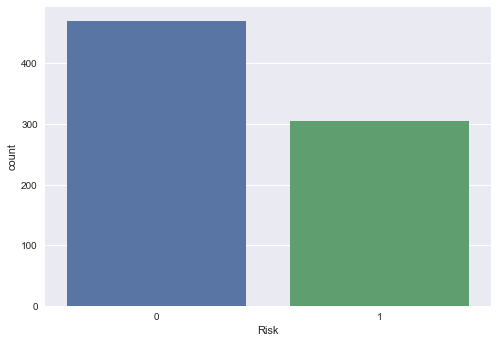

In [21]:
sns.countplot(data['Risk'], label = "Count") 

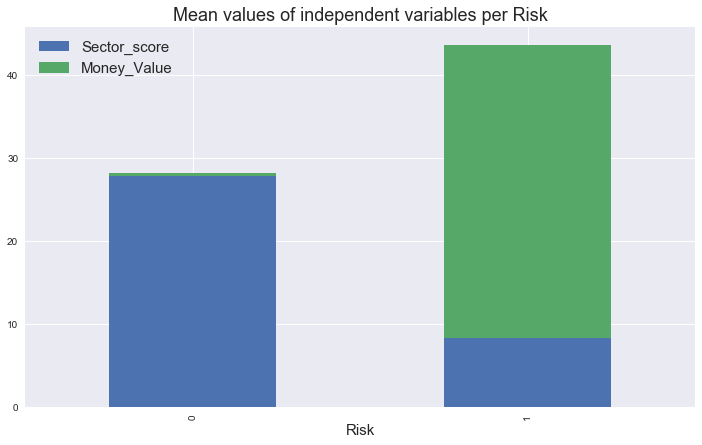

In [22]:
plt.style.use('seaborn')
data[['Sector_score','Money_Value']].groupby(data['Risk']).mean().plot.bar(stacked=True,figsize=(12,7))
plt.xlabel('Risk',fontsize=15)
plt.legend(loc=0, prop={'size': 15})
plt.title('Mean values of independent variables per Risk',fontsize=18)
plt.show()

It is observed that Money_Value & Sector_score variables have high and low values at Risk levels 0 & 1

In [23]:
data.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'PROB', 'History', 'Prob',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk'],
      dtype='object')

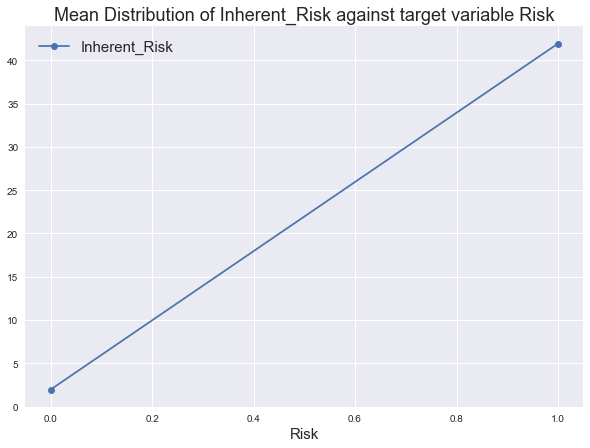

In [24]:
data[['Inherent_Risk']].groupby(data['Risk']).mean().plot.line(stacked=False,figsize=(10,7),marker='o')
plt.legend(loc=0, prop={'size': 15})
plt.xlabel('Risk',fontsize=15)
plt.title('Mean Distribution of Inherent_Risk against target variable Risk',fontsize=18)
plt.show()

The above mentioned graph tells that the target variable is affected by Inherent_Risk as it is directly proportional to Risk. The mean value of Inhenrent_Risk is almost 1 when Risk=0 whereas it is 41 when Risk=1

### Splitting the dataset

In [25]:
#Separating independent and dependent variables
y=data['Risk']
X=data.drop(['Risk'], axis=1, inplace=False)

In [26]:
y.shape

(775,)

In [27]:
X.shape

(775, 15)

In [28]:
y.sum()/y.count()

0.3935483870967742

Approximately 40% of values are Risk=1 which tells that model is not very baised and normal metrics can be used to evaluate performance of Classification models

In [29]:
#Splitting data into train annd test data with 70:30 split
from sklearn.model_selection import train_test_split,cross_val_score
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=13) 

In [30]:
y_train.sum()/y_train.count() 

0.3874538745387454

This confirms that the training and testing splits have same configuration as that of the original data

#### Standardization

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

MinMaxScaler is used for scaling to preserve the variance in the data observed due to outliers which is otherwise subsided through standard scaling technique.

## Logistics Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state = 0, penalty = 'l1')
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Cross-Validation

In [33]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_lreg = cross_val_score(estimator = lreg, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_lreg.mean()

0.9576430976430975

In [34]:
y_predict_lreg = lreg.predict(X_test)
acc= accuracy_score(y_test, y_predict_lreg)
roc=roc_auc_score(y_test, y_predict_lreg)
prec = precision_score(y_test, y_predict_lreg)
rec = recall_score(y_test, y_predict_lreg)
f1 = f1_score(y_test, y_predict_lreg)

results = pd.DataFrame([['Logistic Regression',acc, acc_lreg.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.974249,0.957643,0.978495,0.957895,0.968085,0.971701


<IPython.core.display.Javascript object>


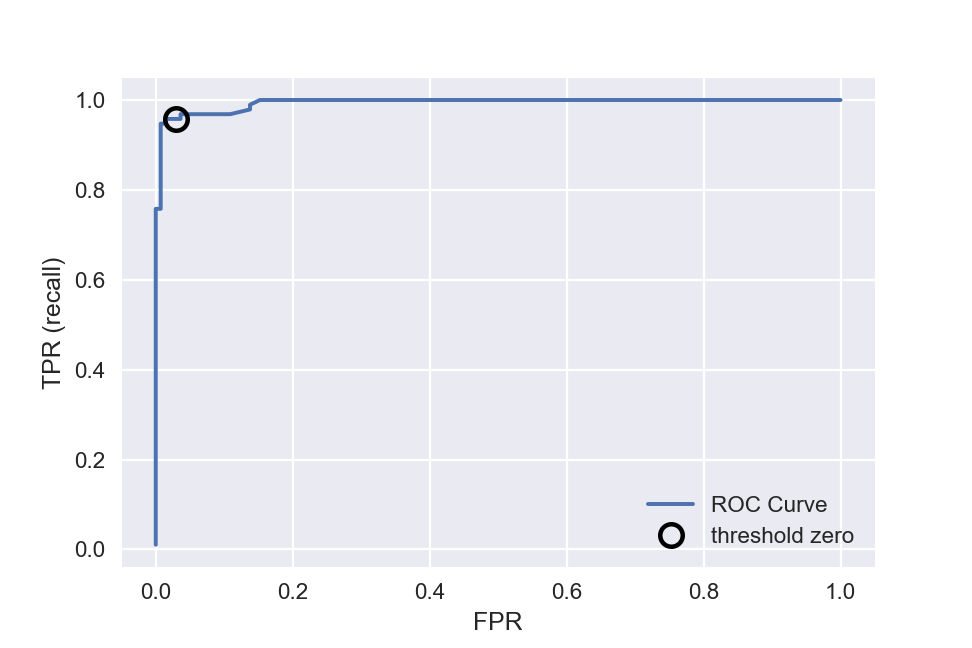

In [49]:
%matplotlib notebook 

from sklearn.metrics import roc_curve
fpr_lreg, tpr_lreg, thresholds_lreg = roc_curve(y_test, lreg.decision_function(X_test))

plt.plot(fpr_lreg, tpr_lreg, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero_lreg = np.argmin(np.abs(thresholds_lreg))
plt.plot(fpr_lreg[close_zero_lreg], tpr_lreg[close_zero_lreg], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Decision Tree 

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

###### Cross Validation

In [37]:
acc_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_dt.mean()

1.0

In [38]:
y_predict_dt = dt.predict(X_test)
roc=roc_auc_score(y_test, y_predict_dt)
acc = accuracy_score(y_test, y_predict_dt)
prec = precision_score(y_test, y_predict_dt)
rec = recall_score(y_test, y_predict_dt)
f1 = f1_score(y_test, y_predict_dt)

model_results = pd.DataFrame([['Decision Tree',acc, acc_dt.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.974249,0.957643,0.978495,0.957895,0.968085,0.971701
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=47, verbose=0, warm_start=False)

#### Cross Validation

In [40]:
acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_rf.mean()

0.9981481481481481

In [41]:
y_predict_rf = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_rf)
acc = accuracy_score(y_test, y_predict_rf)
prec = precision_score(y_test, y_predict_rf)
rec = recall_score(y_test, y_predict_rf)
f1 = f1_score(y_test, y_predict_rf)

model_results = pd.DataFrame([['Random Forest',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.974249,0.957643,0.978495,0.957895,0.968085,0.971701
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,0.998148,1.000000,1.000000,1.000000,1.000000


## Using Ensemble Technique

### Decision Tree Model with Bagging

In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=0)
bag_reg1 = BaggingRegressor(dt_reg, n_estimators=500, max_samples=200, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg1.fit(X_train, y_train)
y_pred1 = bag_reg1.predict(X_test)

In [43]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

In [44]:
acc_tree = cross_val_score(estimator = tree_reg, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_tree.mean()

1.0

In [45]:
y_predict_tree = tree_reg.predict(X_test)
roc=roc_auc_score(y_test, y_predict_tree)
acc = accuracy_score(y_test, y_predict_tree)
prec = precision_score(y_test, y_predict_tree)
rec = recall_score(y_test, y_predict_tree)
f1 = f1_score(y_test, y_predict_tree)

model_results = pd.DataFrame([['Decision Tree with Bagging',acc, acc_tree.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.974249,0.957643,0.978495,0.957895,0.968085,0.971701
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,0.998148,1.000000,1.000000,1.000000,1.000000
3,Decision Tree with Bagging,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Confusion Matrix

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Logistic Regression
print("Logistic Regression")
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_predict_lreg)))

#Decision Tree
print("Decision Tree")
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_predict_dt)))

#Random Forest Classifier
print("Random Forest")
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_predict_rf)))

#Decision Tree with Bagging - Ensemble Technique
print("Decision Tree with Bagging")
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_predict_tree)))

Logistic Regression
Confusion matrix:
[[136   2]
 [  4  91]]
Decision Tree
Confusion matrix:
[[138   0]
 [  0  95]]
Random Forest
Confusion matrix:
[[138   0]
 [  0  95]]
Decision Tree with Bagging
Confusion matrix:
[[138   0]
 [  0  95]]


It is observed that the dataset is easily predicted by different classifications models like Decision Tree, Random Forest etc. Also, it is to be noted that prediction was better than Logistic Regression model for this dataset. However, the performance was evaluated with an Ensemble technique called Bagging and found that the results are consistent. 

### Feature Importace

<IPython.core.display.Javascript object>


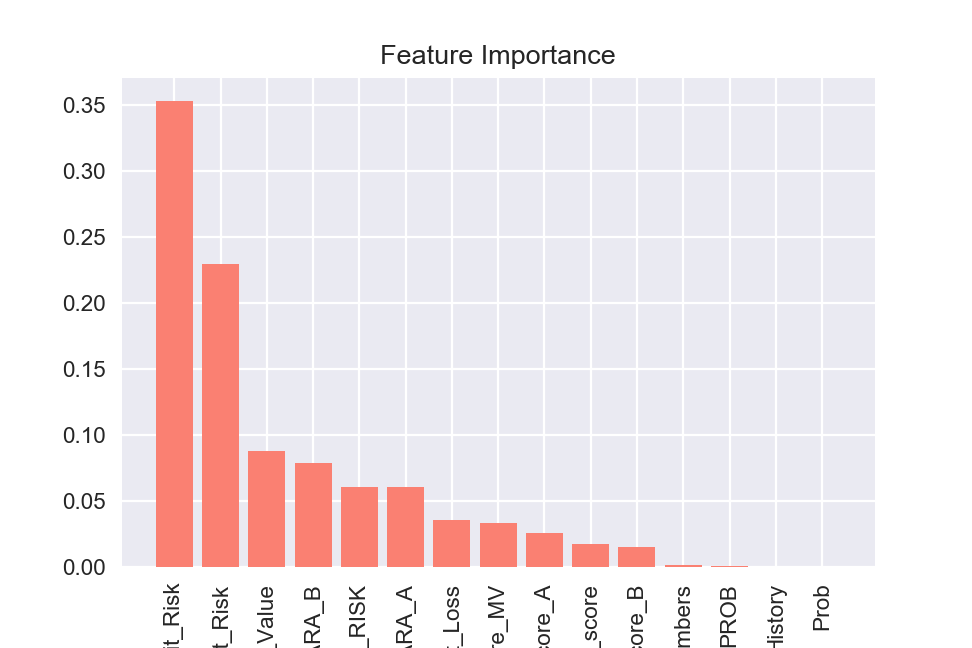

In [50]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], color = 'salmon')
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

###### This tells that Audit_Risk is the most potential variable which has high importance in determining the target variable with the least important variables being Prob, History, PROB, numbers etc.